#Test Notebook - I'm Something Of a Painter Myself

Tal Teri: 319123543

Yehuda Daniel: 211789680

Chen Shalev: 313584906

Ilan Brilovich: 322525072

Lin Tibi: 318232139

##Test Environment

In [ ]:
import gdown

# Define URLs and filenames for both models
urls = [
    'https://drive.google.com/file/d/1ymUmPzICsvReBktrT-joQkaVOe4LEEh5/view?usp=sharing',
    'https://drive.google.com/file/d/1R-NAPYAgXg6TolZlPDj99HfgP2kFGmdV/view?usp=sharing'
]
filenames = ['photoGen.keras', 'monetGen.keras']

# Loop through URLs and download each file
for url, filename in zip(urls, filenames):
  # Extract file ID from the URL
  file_id = url.split('/')[-2]

  # Construct the new direct download link
  new_download_url = f'https://drive.google.com/uc?id={file_id}'

  # Downloading the file with progress indication
  print(f"Downloading {filename}...")
  gdown.download(new_download_url, filename, quiet=False)
  print(f"{filename} downloaded successfully!")

Downloading...
From (original): https://drive.google.com/uc?id=1ymUmPzICsvReBktrT-joQkaVOe4LEEh5
From (redirected): https://drive.google.com/uc?id=1ymUmPzICsvReBktrT-joQkaVOe4LEEh5&confirm=t&uuid=a5a2e14f-08b2-4677-b0c4-0dcdd7adf500
To: /content/photoGen.keras
100%|██████████| 73.2M/73.2M [00:02<00:00, 25.4MB/s]


photoGen.keras downloaded successfully!


Downloading...
From (original): https://drive.google.com/uc?id=1R-NAPYAgXg6TolZlPDj99HfgP2kFGmdV
From (redirected): https://drive.google.com/uc?id=1R-NAPYAgXg6TolZlPDj99HfgP2kFGmdV&confirm=t&uuid=2224383e-398e-4879-a512-244bfdbe193c
To: /content/monetGen.keras
100%|██████████| 73.2M/73.2M [00:02<00:00, 29.2MB/s]

monetGen.keras downloaded successfully!


Saving pikachu.jpg to pikachu.jpg
Shape of preprocessed image: (256, 256, 3)


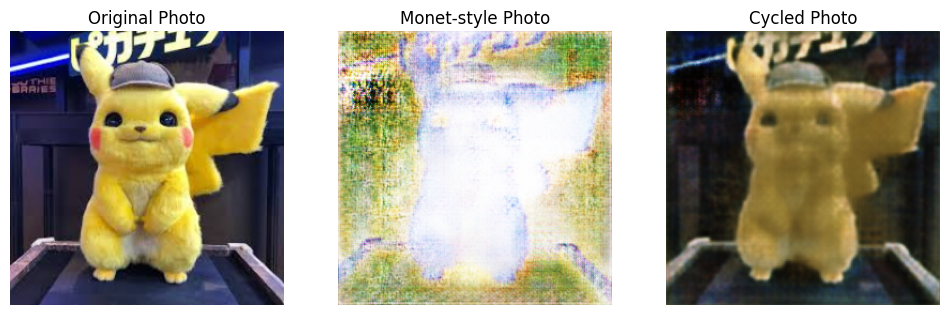

In [ ]:
from tensorflow import keras
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files  # For uploading files in Colab
import cv2
import matplotlib.pyplot as plt

# Load the photo and Monet generators
photo_generator = load_model('/content/photoGen.keras')
monet_generator = load_model('/content/monetGen.keras')

# Function to preprocess the uploaded image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (256, 256))  # Resize to 256x256
    img = img / 127.5 - 1  # Normalize to [-1, 1]
    return img

# Function to postprocess the generated image
def postprocess_image(img):
    img = 0.5 * img + 0.5  # Rescale to [0, 1]
    return img

# Function to test the CycleGAN model (using separate generators)
def test_cycle_gan(image):
    # Preprocess the uploaded image
    input_image = preprocess_image(image)

    # Print the shape of the preprocessed image
    print("Shape of preprocessed image:", input_image.shape)

    # Remove the extra dimension introduced by tf.expand_dims
    input_image = input_image[np.newaxis, ...]

    # Generate monet photo
    generated_image = monet_generator(input_image, training=False)[0]

    # Generate cycled photo using both generators
    cycled_image = photo_generator(monet_generator(input_image, training=False), training=False)[0]

    # Postprocess the generated images
    input_image = postprocess_image(input_image[0])
    generated_image = postprocess_image(generated_image)
    cycled_image = postprocess_image(cycled_image)

    # Plot the original, generated, and cycled images
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Photo")
    plt.imshow(input_image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Monet-style Photo")
    plt.imshow(generated_image)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Cycled Photo")
    plt.imshow(cycled_image)
    plt.axis('off')

    plt.show()


def upload_image():
    uploaded = files.upload()  # Upload file using Colab's uploader
    for filename, content in uploaded.items():
        # Check for valid image extension (optional)
        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"Error: Unsupported image format. Please upload a JPG, JPEG, or PNG file.")
            return

        # Process the uploaded image content
        img = np.frombuffer(content, np.uint8)

        # Decode the image using OpenCV (assuming JPG)
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Error: Failed to decode image. Please check if the file is corrupted.")
            return

        test_cycle_gan(img)
        return

# Call the upload function
upload_image()